In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
data = pd.read_csv('expanded_fertility_diagnosis.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 200 non-null    float64
 1   age                    200 non-null    float64
 2   child_diseases         200 non-null    int64  
 3   accident               200 non-null    int64  
 4   surgical_intervention  200 non-null    int64  
 5   high_fevers            200 non-null    int64  
 6   alcohol                200 non-null    float64
 7   smoking                200 non-null    int64  
 8   hrs_sitting            200 non-null    float64
 9   diagnosis              200 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 15.8+ KB


In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

Categorical columns: Index(['diagnosis'], dtype='object')


In [ ]:
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [5]:
data.head(5)

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


In [6]:
data.isna().sum()

season                   0
age                      0
child_diseases           0
accident                 0
surgical_intervention    0
high_fevers              0
alcohol                  0
smoking                  0
hrs_sitting              0
diagnosis                0
dtype: int64

In [ ]:

X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]


X = X.astype('float32')
y = y.astype('float32')

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)


In [ ]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50


c:\Users\kumar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5427 - loss: 0.6902 - val_accuracy: 0.7917 - val_loss: 0.6680
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9554 - loss: 0.6375 - val_accuracy: 0.7917 - val_loss: 0.6334
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9432 - loss: 0.5772 - val_accuracy: 0.7917 - val_loss: 0.5880
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9536 - loss: 0.4848 - val_accuracy: 0.7917 - val_loss: 0.5421
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9286 - loss: 0.4043 - val_accuracy: 0.7917 - val_loss: 0.5257
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9116 - loss: 0.3596 - val_accuracy: 0.7917 - val_loss: 0.5692
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9310 - loss: 0.3201 - val_accuracy: 0.7917 - val_loss: 0.6444
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9437 - loss: 0.2399 - val_accuracy: 0.7917 - val_loss: 0.6987
Epoch 9/50
6/6 ━━━

In [ ]:

y_pred = (model.predict(X_test) > 0.5).astype("int32") 
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.94        68
         1.0       0.83      0.42      0.56        12

    accuracy                           0.90        80
   macro avg       0.87      0.70      0.75        80
weighted avg       0.89      0.90      0.89        80


Confusion Matrix:
 [[67  1]
 [ 7  5]]


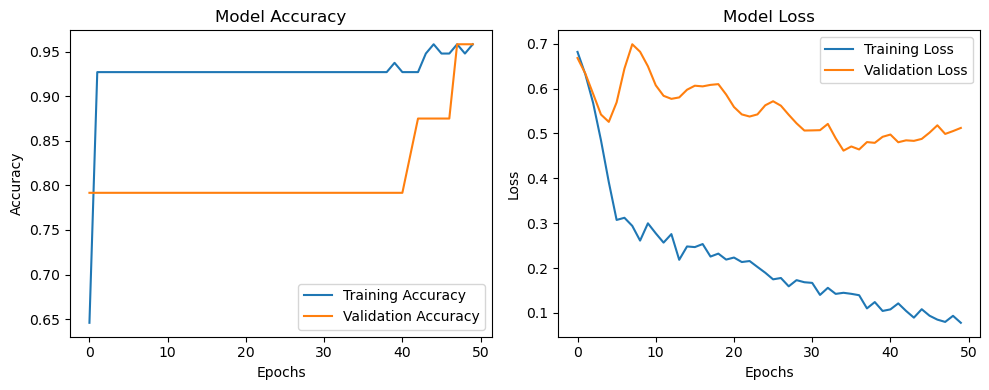

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [74]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,324 (95.02 KB)

In [75]:
model.save('fertility_classification.h5')

In [76]:
def representative_dataset():
    for _ in range(100):
      data =  X_test
      yield [data.astype(np.float32)]

print(representative_dataset())

<generator object representative_dataset at 0x00000273D5B6DBE0>


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open('Fertility_classification.tflite', 'wb') as f:
    f.write(tflite_model)
print("TFLite model saved as occupancy_detection.tflite")

INFO:tensorflow:Assets written to: C:\Users\kumar\AppData\Local\Temp\tmpbq7wy9m5\assets


INFO:tensorflow:Assets written to: C:\Users\kumar\AppData\Local\Temp\tmpbq7wy9m5\assets


Saved artifact at 'C:\Users\kumar\AppData\Local\Temp\tmpbq7wy9m5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='keras_tensor_143')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2696470630608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2696470638096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2696470627920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2696470636176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2696470638480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2696311049104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2696470636368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2696311048912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2696433961296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2696433958992: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model 

In [ ]:
interpreter = tf.lite.Interpreter(model_path="Fertility_classification.tflite")
interpreter.allocate_tensors()

In [ ]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'serving_default_keras_tensor_143:0', 'index': 0, 'shape': array([1, 9]), 'shape_signature': array([-1,  9]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall_1:0', 'index': 16, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [96]:
X_test[3]

array([0.33499998, 0.88      , 1.        , 0.        , 1.        ,
       0.5       , 0.75      , 1.        , 0.26595744], dtype=float32)

In [95]:
y_test

95     0.0
15     0.0
30     0.0
158    1.0
128    0.0
      ... 
113    0.0
26     1.0
139    0.0
100    0.0
111    0.0
Name: diagnosis, Length: 80, dtype: float32

In [ ]:

input1_data = [[0.        , 0.34000003, 1.        , 0.        , 0.        ,
       0.5       , 1.        , 0.        , 0.4680851 ]]
print(input1_data)
input1_data = np.array(input1_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input1_data)

interpreter.invoke()

output1_data = interpreter.get_tensor(output_details[0]['index'])
print('output1:')
print(output1_data)

output1_data = model.predict(input1_data)
print(output1_data)

[[0.0, 0.34000003, 1.0, 0.0, 0.0, 0.5, 1.0, 0.0, 0.4680851]]
output1:
[[0.0006529]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.0006529]]


In [ ]:
import time, sys

def hex_to_c_array(hex_data, var_name):
    c_str = ""

    
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += "#define " + var_name.upper() + '_H\n\n'

    c_str += "/*\n Author: G Mohith \n"
    c_str += " CAUTION: This is an auto generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"


    localtime = time.asctime( time.localtime(time.time()) )
    c_str += " This model data was generated on " + localtime+ '\n\n'
    print("This model data was generated on:", localtime)


    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" + str(np.version.version) + \
          "\n TensorFlow:" + str(sys.version) + "\n Keras: "+ str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.version.version, \
          "\n TensorFlow:", sys.version, "\n Keras: ", tf.keras.__version__, "\n\n")


    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS = ' + str(50) + '\n'
    c_str += ' BATCH_SIZE    = ' + str(16) + '\n*/\n'



    c_str += '\nconst int ' + 'DENSE1_SIZE' + ' = ' + str(128) + ';\n'
    c_str += 'const float ' + 'DROPOUT1_RATE' + ' = ' + str(0.3) + ';\n'
    c_str += 'const int ' + 'DENSE2_SIZE' + ' = ' + str(64) + ';\n'
    c_str += 'const float ' + 'DROPOUT2_RATE' + ' = ' + str(0.3) + ';\n'
    c_str += 'const int ' + 'DENSE3_SIZE' + ' = ' + str(32) + ';\n'
    c_str += 'const float ' + 'DROPOUT3_RATE' + ' = ' + str(0.2) + ';\n'
    c_str += 'const int ' + 'DENSE4_SIZE' + ' = ' + str(16) + ';\n'
    c_str += 'const int ' + 'DENSE5_SIZE' + ' = ' + str(1) + ';\n'


    

    
    c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    
    c_str += 'alignas(8) const unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data):
        
        hex_str = format(val, '#04x')

        
        if (i + 1) < len(hex_data):
          hex_str += ','
        if (i + 1) % 12 == 0:
          hex_str += '\n'
        hex_array.append(hex_str)

    
    c_str += '\n' + format(''.join(hex_array)) + '\n};\n\n'

    
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [ ]:

with open("flrt_nn_esp32" + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, "flrt_nn_esp32"))

This model data was generated on: Thu Nov 14 10:45:18 2024
Tools used: Python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)] 
 Numpy: 1.26.4 
 TensorFlow: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)] 
 Keras:  3.5.0 




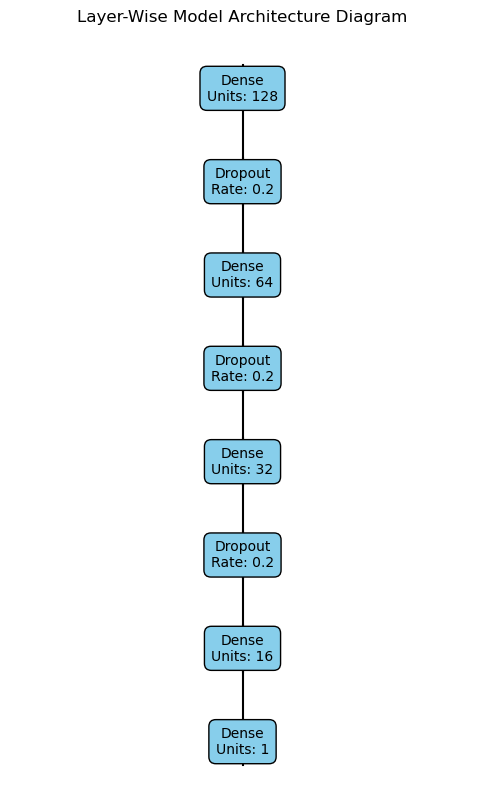

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


X_train = np.random.rand(100, 4)  
y_train = np.random.randint(2, size=100)  


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model(tf.random.uniform((1, X_train.shape[1]))) 


plt.figure(figsize=(6, 10))
plt.axis('off')


y_positions = list(range(len(model.layers) * 2, 0, -2))
x_position = 1


for i, layer in enumerate(model.layers):
    if isinstance(layer, tf.keras.layers.Dense):
        label = f"{layer.__class__.__name__}\nUnits: {layer.units}"
    elif isinstance(layer, tf.keras.layers.Dropout):
        label = f"{layer.__class__.__name__}\nRate: {layer.rate}"
    else:
        label = layer.__class__.__name__

    
    plt.text(x_position, y_positions[i], label, ha='center', va='center',
             bbox=dict(facecolor='skyblue', edgecolor='black', boxstyle='round,pad=0.5'))

    
    if i > 0:
        plt.plot([x_position, x_position], [y_positions[i-1] + 0.5, y_positions[i] - 0.5], 'k-')


plt.title("Layer-Wise Model Architecture Diagram")
plt.show()
